### Create Stress Strain Curves
Calculating averages:
- Young's Modulus
- Max Strength
- Elongation at failure

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
from sklearn.neighbors import LocalOutlierFactor


In [70]:
# Set the color for the histogram
color1 ='#4d00c7'
palecolor1="#b366ff"
color2= '#da3c07'
palecolor2="#ff8954"
color3='#05d3d3'
color4='#c6c7c5'
color5='black'


# Create the color palette
palette = sns.color_palette([palecolor1, palecolor2, color3, color4])
import matplotlib.colors
#need to find the distance between promoters of interest and guide KD 
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [color1, color2, color3])



1) input the length, height, width, and thickness of the sample from list of samples
2) concating the dataframes with concat 
3) initially zero the data (minus the initial value)
4) remove the plateau and remove the inital non-linear region 
5) transform from :
- force to stress  (stress=force /cross sectional area)
- elongation to strain (strain= elongation/length)



In [71]:
folder_loc="/Users/hellyk/Desktop/James/text/*txt" #write the location of the files
file_list_loc=glob.glob(folder_loc,recursive=True) #find all files of this name
file_list=[] #create empty list to fill
new_dataframe=pd.DataFrame() #create empty dataframe to fill
for file in file_list_loc: #loop through the list 
    file_dataframe=pd.read_table(file, header=None) #read in the file of interest
    file_list.append(file_dataframe) #append content of every text file to list 
    file_dataframe["filename"]=file.split("/")[-1].split(".")[0] #add filename to dataframe
    ###other dataframe for excel#33 
    new_dataframe=pd.concat([file_dataframe, new_dataframe], axis=1)
    
new_dataframe.to_excel("~/Desktop/James/combined.xlsx") #write to excel file
final_file_list_df=pd.concat(file_list) #flatten the file
final_file_list_df=final_file_list_df.reset_index(drop=True) #reset index
final_file_list_df.columns=["time","elongation","force","sample"]

In [72]:
sample="K10_4"



In [73]:

import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot


def visualisation_stress_plot(sample,dataframe ):
    #for each sample plot the graph and wait for input to filter the 
    test_dataframe=dataframe[dataframe["sample"]==sample]
    init_notebook_mode(connected=True)
    # Create a line (trace) for the global sales
    trace0 = go.Scatter(x=test_dataframe["elongation"], y=test_dataframe["force"], name="force")
    # Define the data array
    data = [trace0]
    # Set the title
    layout = {"title": "Visualisation of "+sample}
    # Create a Figure and plot it
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, show_link=False)
    return test_dataframe


test_df=visualisation_stress_plot(sample="K10_4",dataframe=final_file_list_df)

In [74]:
####create an expanded list of numbers where the filter removes
#0-0.37,0.4-1.15,1.66-1.7
fitler=input("Filter between these numbers (Formatted 0-4):")
print(fitler)
first_number=float(fitler.split("-")[0])
second_number=float(fitler.split("-")[1])
print(first_number,second_number)

#remove outlier 
#remove plateau 

filtered_test_df=test_df[~((test_df["elongation"]>=first_number) & (second_number>=test_df["elongation"]))]
#correct for change of values afterwards
#0-0.37
#where np[]
difference_numbers=(second_number-first_number)
filtered_test_df["elongation"]=np.where(filtered_test_df["elongation"]>=second_number,filtered_test_df["elongation"]-difference_numbers,filtered_test_df["elongation"] )



0-0.37
0.0 0.37


/var/folders/rz/x4vq1m_n3fxcrf5gz_lmhxcc0000gn/T/ipykernel_39049/3621834726.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
filtered_test_df=visualisation_stress_plot(sample="K10_4",dataframe=filtered_test_df)

In [76]:
###this is bad practice but just to continue
first_number=0.43 - difference_numbers
second_number=1.15 - difference_numbers

filtered_test_df=filtered_test_df[~((filtered_test_df["elongation"]>first_number) & (filtered_test_df["elongation"]<second_number))]
filtered_test_df["elongation"]=np.where(filtered_test_df["elongation"]>=second_number,filtered_test_df["elongation"]-(second_number-first_number),filtered_test_df["elongation"] )
filtered_test_df=visualisation_stress_plot(sample="K10_4",dataframe=filtered_test_df)

In [79]:
#minus first value from every other 
filtered_test_df.sort_values(by="elongation")


,time,elongation,force,sample
21209,4.41,0.01,5.85,K10_4
21220,4.52,0.01,9.11,K10_4
21219,4.51,0.01,8.82,K10_4
21218,4.50,0.01,8.50,K10_4
21216,4.48,0.01,7.89,K10_4
...,...,...,...,...
22737,19.69,0.56,184.46,K10_4
22747,19.79,0.57,127.09,K10_4
22745,19.77,0.57,185.96,K10_4
22746,19.78,0.57,186.17,K10_4


In [78]:
filtered_test_df=visualisation_stress_plot(sample="K10_4",dataframe=filtered_test_df)

In [31]:


filtered_test_df




# # Create a figure with two subplots
# fig, ax = plt.subplots(1, 2, figsize=(10, 8), dpi= 600, facecolor='none')
# sns.lineplot(x="elongation",y="force",data=test_dataframe, ax=ax[0])
# sns.scatterplot(x="elongation",y="force",data=test_dataframe, ax=ax[1])

,time,elongation,force,sample
21197,4.29,0.37,3.19,K10_4
21198,4.30,0.37,3.26,K10_4
21199,4.31,0.37,3.41,K10_4
21200,4.32,0.37,3.64,K10_4
21201,4.33,0.37,3.86,K10_4
...,...,...,...,...
22744,19.76,1.65,185.78,K10_4
22745,19.77,1.66,185.96,K10_4
22746,19.78,1.66,186.17,K10_4
22747,19.79,1.66,127.09,K10_4


In [8]:
sample=["elongation"] #elongation subset 
diff = np.diff(sample) #calculate the difference between the the point and the point before
diff_final=[0] #list
diff_final.extend(diff)#extend 
gradient = np.sign(diff) #find the gradient 

In [11]:
subset

,force,elongation
20769,0.01,1.74
20770,0.01,1.82
20771,0.01,1.90
20772,0.01,1.95
20773,0.01,1.97
...,...,...
22744,1.65,185.78
22745,1.66,185.96
22746,1.66,186.17
22747,1.66,127.09


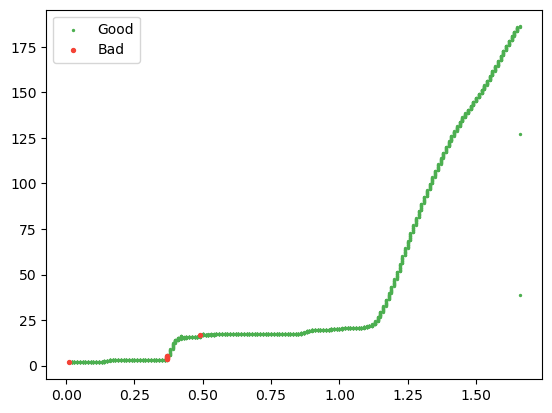

In [10]:
from scipy.ndimage import median_filter

subset=final_file_list_df[final_file_list_df["sample"]=="K10_4"][["force","elongation"]]


lof = LocalOutlierFactor(n_neighbors=20, contamination=0.005)
good = lof.fit_predict(subset) == 1

plt.scatter(subset.loc[good,"force" ], subset.loc[good,"elongation" ], s=2, label="Good", color="#4CAF50")
plt.scatter(subset.loc[~good,"force" ], subset.loc[~good,"elongation" ],s=8, label="Bad", color="#F44336")
plt.legend()


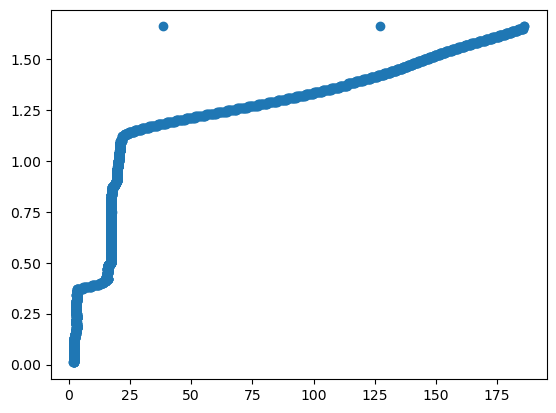

In [52]:
plt.scatter(data=final_file_list_df[final_file_list_df["sample"]=="K10_4"], y="force", x="elongation")
#example


In [ ]:
# get the gradient
dy = np.gradient(y)

# search gradient for first occurrence of thresh value:
thresh = 0.01
idx_thresh = np.argmax(dy > thresh)

<Axes: xlabel='elongation', ylabel='force'>

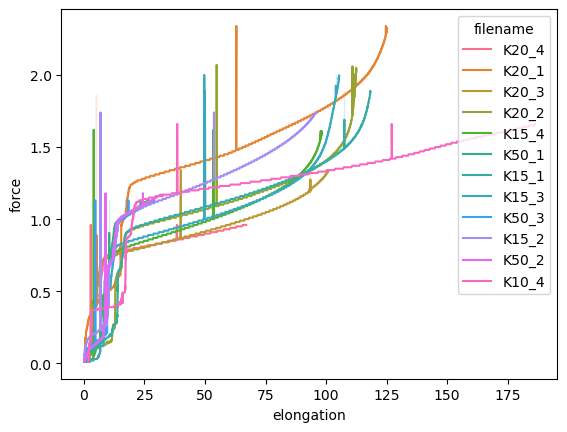

In [6]:
##issues with a plateau in the data 
sns.lineplot(data=final_file_list_df, y="force", x="elongation", hue="sample")